In [1]:
#old version
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/masks/comment.png
/kaggle/input/masks/user.png
/kaggle/input/masks/loc.png
/kaggle/input/masks/star.png
/kaggle/input/masks/upvote.png
/kaggle/input/masks/masks-wordclouds/comment.png
/kaggle/input/masks/masks-wordclouds/user.png
/kaggle/input/masks/masks-wordclouds/loc.png
/kaggle/input/masks/masks-wordclouds/star.png
/kaggle/input/masks/masks-wordclouds/upvote.png
/kaggle/input/tempstopwords/stopwords
/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/kumarmanoj-bag-of-words-meets-bags-of-popcorn/labeledTrainData.tsv
/kaggle/input/kumarmanoj-bag-of-words-meets-bags-of-popcorn/testData.tsv
/kaggle/input/kumarmanoj-bag-of-words-meets-bags-of-popcorn/unlabeledTrainData.tsv
/kaggle/input/kumarmanoj-bag-of-words-meets-bags-of-popcorn/sampleSubmission.csv
/kaggle/input/twitter-airline-sentiment/database.sqlite
/kaggle/input/twitter-airline-sentiment/Tweets.csv


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
#print(os.listdir("/kaggle/input/twitter-airline-sentiment"))
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Any results you write to the current directory are saved as output.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [ ]:
df= pd.read_csv("/kaggle/input/twitter-airline-sentiment/Tweets.csv")
df.head()
#df.describe()

In [4]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [5]:
p_df = pd.read_csv("/kaggle/input/twitter-airline-sentiment/Tweets.csv")

In [2]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


#p_df = pd.read_csv("/kaggle/input/kumarmanoj-bag-of-words-meets-bags-of-popcorn/labeledTrainData.tsv", sep='\t', header=0, index_col='id')
p_df2 = pd.read_csv(r"C:\Users\jz3f19\Downloads\sentiment140\data.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
#p_df2 = pd.read_csv(r"/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [109]:
#p_df.describe()
p_df2.head()

,target,ids,date,flag,user,text,text_cleaned,words,word_length,c2id
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",switchfoot awww bummer you shoulda got david carr third day,"[19127, 374, 1122, 39, 3280, 6, 632, 8572, 1709, 1]",10,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset update facebook texting might cry result school today also blah,"[683, 435, 422, 1980, 171, 415, 2102, 70, 7, 150, 1002]",11,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,kenichan dived many times ball managed save the rest bounds,"[27392, 67378, 196, 223, 1066, 1434, 763, 32, 333, 23953]",10,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,"[294, 666, 357, 3117, 4, 983]",6,0
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",loltrish hey long time see yes rains bit bit lol fine thanks,"[111833, 77, 81, 12, 18, 84, 2609, 142, 142, 10, 407, 33]",12,0


In [110]:
1+1

2

In [3]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    clean_text2(text)
    return text


def clean_text2(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('@', '', text)
    return text

#p_df['new_review'] = p_df.review.apply(lambda x: clean_text(x))
#p_df['new_review'] = p_df.text.apply(lambda x: clean_text(x))
p_df2['text_cleaned'] = p_df2.text.apply(lambda x: clean_text(x))

In [4]:
def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r"https:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
    
    if '@' in tweet:
        tweet = tweet.replace('@', '')
    
    
    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)    
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    return tweet

#p_df['text_cleaned'] = p_df['text'].apply(lambda s : clean(s))
p_df2['text_cleaned'] = p_df2.text.apply(lambda x: clean(x))

In [5]:
#p_df['text_cleaned']
p_df2.head()

,target,ids,date,flag,user,text,text_cleaned
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http : / / twitpic . com / 2y1z...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his Facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball . ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","nationwideclass no, it is not behaving at al..."


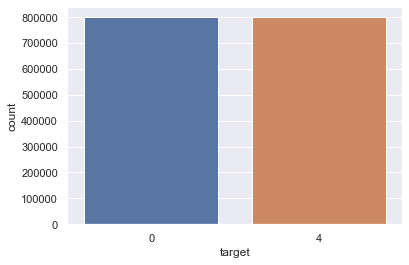

In [17]:
import seaborn as sns
#ig, axes = plt.subplots(ncols=1, figsize=(17, 4), dpi=100)
#plt.tight_layout()

#sns.countplot(x=p_df['sentiment'], hue=p_df['sentiment'], ax=axes[0])

sns.set(style="darkgrid")
ax = sns.countplot(x=p_df2['target'], data=p_df2)
#ax.set_xticklabels(['Positive', 'Netural','Negative'])

In [ ]:
import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x=p_df['airline_sentiment'], data=p_df)
#ax.set_xticklabels(['Positive', 'Netural','Negative'])

In [ ]:
p_df['sentiment'] = 0
for i in range(len(p_df['airline_sentiment'])):
    if p_df['airline_sentiment'][i] == 'positive':
        p_df['sentiment'][i] = 0
    elif p_df['airline_sentiment'][i] == 'neutral':
        p_df['sentiment'][i] = 1
    else:
        p_df['sentiment'][i] = 2

In [ ]:
from wordcloud import STOPWORDS
import string


# p_df['word_count'] = p_df['new_review'].apply(lambda x: len(str(x).split()))
# p_df['unique_word_count'] = p_df['new_review'].apply(lambda x: len(set(str(x).split())))
# p_df['stop_word_count'] = p_df['new_review'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
# p_df['mean_word_length'] = p_df['new_review'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# p_df['char_count'] = p_df['new_review'].apply(lambda x: len(str(x)))
# p_df['punctuation_count'] = p_df['new_review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

p_df['word_count'] = p_df['text_cleaned'].apply(lambda x: len(str(x).split()))
p_df['unique_word_count'] = p_df['text_cleaned'].apply(lambda x: len(set(str(x).split())))
p_df['stop_word_count'] = p_df['text_cleaned'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
p_df['mean_word_length'] = p_df['text_cleaned'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
p_df['char_count'] = p_df['text_cleaned'].apply(lambda x: len(str(x)))
p_df['punctuation_count'] = p_df['text_cleaned'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))






In [ ]:
p_df['word_count']

In [ ]:
p_df['sentiment'].head()

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)
tips.head()
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(1,figsize=(15,15))
# airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
# for i in airlines:
#     indices=airlines.index(i)
#     plt.subplot(2,3,indices+1)
#     new_df=df[df['airline']==i]
#     count=new_df['airline_sentiment'] .value_counts()
#     x=np.arange(3)
#     plt.xticks(x,['negative','positive','neutral'])
#     plt.ylabel('Mood Count')
#     plt.xlabel('Mood')
#     plt.title('Count of Moods of '+i)
#     plt.bar(x,count,color=['#FFB6C1', 'green', 'blue'])
    

sns.countplot(x="airline", hue="airline_sentiment", data=p_df)
plt.show()    
    
# sns.barplot(x=p_df['airline'], y=li, hue="airline_sentiment", data=p_df, capsize=.05)
# plt.show()


In [ ]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length','punctuation_count']
positive = p_df['sentiment'] == 0
neutral = p_df['sentiment'] == 1
negative = p_df['sentiment'] == 2

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    
    sns.distplot(p_df[positive][feature], label='Positive', ax=axes[i][0], color='green')
    sns.distplot(p_df[neutral][feature], label='Neutral', ax=axes[i][0], color='red')
    sns.distplot(p_df[negative][feature], label='Negative', ax=axes[i][0], color='blue')
    sns.distplot(p_df[feature], label='Training', ax=axes[i][1])
    #sns.distplot(p_df[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    #axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [ ]:
from collections import Counter
import plotly.express as px
import plotly.figure_factory as ff


p_df['temp_list'] = p_df['new_review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in p_df['temp_list'] for item in sublist])
freq_list = pd.DataFrame(top.most_common(20))
freq_list.columns = ['freq_words','count']
freq_list.style.background_gradient(cmap='Blues')

In [ ]:
fig = px.bar(freq_list, x="count", y="freq_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='freq_words')
fig.show()

In [ ]:
p_df.head()

In [ ]:
# remove stopwords
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
p_df['removed_words_list'] = p_df['text_cleaned'].apply(lambda x:remove_stopword(x))


top = Counter([item for sublist in p_df['text_cleaned'] for item in sublist])
stopword_list = pd.DataFrame(top.most_common(20))
stopword_list = stopword_list.iloc[1:,:]
stopword_list.columns = ['stopwords','count']
stopword_list.style.background_gradient(cmap='Greens')

In [ ]:
fig = px.treemap(stopword_list, path=['stopwords'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
positive_sentiment = p_df[p_df['sentiment']==0]
negative_sentiment = p_df[p_df['sentiment']==1]
neutral_sentiment = p_df[p_df['sentiment']==2]

In [ ]:
positive_sentiment

In [ ]:
#do not run this code
# p_df['temp_text_cleaned'] = p_df['text_cleaned'].apply(lambda x:str(x).split()) #List of words in every row for text
# p_df['temp_text_cleaned'] = p_df['text_cleaned'].apply(lambda x:str(x).split())
# p_df['temp_text_cleaned'] = p_df['temp_text_cleaned'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [ ]:
p_df['temp_text_cleaned'] 

In [ ]:
def subsitute_clean(tweet):
    words = []
    for word in tweet:
        word = word.replace('#', '').replace('!', '').replace('?', '').replace('-', '').replace(':', '')\
        .replace('2', '').replace("'", ''). replace('&', '').replace(')', '').replace('/', '').replace('(', '')
        if word != '':
            words.append(word)
    return words

p_df['temp_text_cleaned'] = p_df['temp_text_cleaned'].apply(lambda s : subsitute_clean(s))

In [ ]:
top = Counter([item for sublist in p_df['temp_text_cleaned'] for item in sublist])
temp_text_cleaned_list = pd.DataFrame(top.most_common(25))
temp_text_cleaned_list = temp_text_cleaned_list.iloc[1:,:]
temp_text_cleaned_list.columns = ['common_words','count']
temp_text_cleaned_list.style.background_gradient(cmap='Blues')
#到这步数据还没清洗成功，还有部分特殊字符，影响不大，后面补回来缺失字符即可,还有特殊字符没处理

In [ ]:
fig = px.bar(temp_text_cleaned_list, x="count", y="common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='common_words')
fig.show()

In [ ]:
#MosT common negative words
top = Counter([item for sublist in negative_sentiment['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['common_words','count']
temp_negative.style.background_gradient(cmap='Reds')
fig = px.treemap(temp_negative, path=['common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [ ]:
#MosT common Neutral words
top = Counter([item for sublist in neutral_sentiment['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [ ]:
fig = px.bar(temp_neutral, x="count", y="common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='common_words')
fig.show()

In [ ]:
fig = px.treemap(temp_neutral, path=['common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

In [ ]:
raw_text = [word for word_list in p_df['temp_list'] for word in word_list]

In [ ]:
raw_text

In [ ]:
def words_unique(sentiment,numwords,raw_words):
    allother = []
    for item in p_df[p_df.sentiment != sentiment]['temp_list']:
        for word in item:
            allother.append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in p_df[p_df.sentiment == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return unique_words

unique_positive= words_unique(0, 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
unique_positive.style.background_gradient(cmap='Greens')

In [ ]:
fig = px.treemap(unique_positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(unique_positive['count'], labels=unique_positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [ ]:
unique_negative= words_unique(1, 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
unique_negative.style.background_gradient(cmap='Reds')

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(unique_negative['count'], labels=unique_negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks/masks-wordclouds/'

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#/kaggle/input/masks/masks-wordclouds/comment.png
pos_mask = np.array(Image.open(d + 'star.png'))
plot_wordcloud(neutral_sentiment.text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets")

pos_mask = np.array(Image.open(d + 'star.png'))
plot_wordcloud(positive_sentiment.text,mask=pos_mask,title="Word Cloud Of Positive tweets",title_size=30)

pos_mask = np.array(Image.open(d + 'user.png'))
plot_wordcloud(negative_sentiment.text,mask=pos_mask,title="Word Cloud of Negative Tweets",color='white',title_size=30)

In [ ]:
from gensim import corpora, models, similarities
import logging
from collections import defaultdict  
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
p_df.head()

In [ ]:
#下面开始模型训练

In [ ]:
p_df.head()

In [6]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

nltk.download('punkt')

Using TensorFlow backend.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [29]:
def list2str(words):
    tempstr = ''
    for word in words:
        if len(word) > 2:
            tempstr += word.lower() + ' ' #这种拼接效率低
    return tempstr


def keepwords(text):
    temp = re.sub('[^a-zA-Z]', ' ', text)
    return temp.lower()


def removeShortWord(text):
    words = nltk.word_tokenize(text)
    stops = set(stopwords.words('english'))
    words = [word for word in words if len(word) > 2 and word not in stops] # if w not in stops
    res = list2str(words)
    return res

def removeUseless(tweet):
    #tweet = re.sub("http:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet, flags=re.MULTILINE)
    #tweet = re.sub('\W+', ' ', tweet).replace("_", '')
    tweet = re.sub(u"([^\u0061-\u007a\u0041-\u005a])"," ",tweet)
    #tweet
    return tweet
# index = 0 
# #只留words
# for text in p_df.text_cleaned:
#     temp = re.sub('[^a-zA-Z]', ' ', text)
#     p_df.text_cleaned[index] = temp.lower()
#     index += 1

In [38]:
p_df2['text_cleaned'] = p_df2.text.apply(lambda x: removeUseless(x))

In [34]:
#p_df2['text_cleaned'] = p_df2.text_cleaned.apply(lambda x: keepwords(x))

In [40]:
p_df2['text_cleaned'] = p_df2.text_cleaned.apply(lambda x: removeShortWord(x))

In [41]:
p_df2.head()

,target,ids,date,flag,user,text,text_cleaned,words,word_length,c2id
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",switchfoot awww bummer you shoulda got david carr third day,"[18877, 6, 65, 16, 318, 1009, 3251, 7, 612, 8697, 1686, 2]",12,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset update facebook texting might cry result school today also blah,"[631, 402, 372, 1824, 178, 388, 2092, 67, 8, 159, 961]",11,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,kenichan dived many times ball managed save the rest bounds,"[26696, 79492, 195, 231, 1046, 1495, 740, 334, 25630]",9,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,"[298, 649, 346, 2683, 4, 958]",6,0
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",loltrish hey long time see yes rains bit bit lol fine thanks,"[134617, 71, 81, 13, 20, 72, 2436, 53, 53, 12, 386, 28]",12,0


In [ ]:
index = 0
for text in p_df2.text_cleaned:
    temp = re.sub('[^a-zA-Z]', ' ', text)
    words = nltk.word_tokenize(temp)
    #去掉长度小于2的词，暂时没想到高效率的办法
    #words = [word for word in words if len(word) > 2]
    p_df2.text_cleaned[index] = list2str(words)
    index += 1

In [ ]:
index = 0
for text in p_df.text_cleaned:
    temp = re.sub('[^a-zA-Z]', ' ', text)
    words = nltk.word_tokenize(temp)
    #去掉长度小于2的词，暂时没想到高效率的办法
    words = [word for word in words if len(word) > 2]
    p_df.text_cleaned[index] = list2str(words)
    index += 1

In [ ]:
index = 0
for text in p_df.text_cleaned:
    temp = re.sub('[^a-zA-Z]', ' ', text)
    words = nltk.word_tokenize(temp)
    #去掉长度小于2的词，暂时没想到高效率的办法
    words = [word for word in words if len(word) > 2]
    p_df.text_cleaned[index] = list2str(words)
    index += 1

In [12]:
pd.set_option('display.max_colwidth', -1)
p_df2.head()

,target,ids,date,flag,user,text,text_cleaned
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",switchfoot http twitpic com awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset update facebook texting might cry result school today also blah
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,kenichan dived many times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",nationwideclass behaving mad see


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(p_df2.text_cleaned)
p_df_X = tokenizer.texts_to_sequences(p_df2.text_cleaned)

In [43]:
p_df2.shape[0]

1159316

In [44]:
p_df2['words'] = p_df_X
p_df2['word_length'] = p_df2.words.apply(lambda i: len(i))
p_df2 = p_df2[p_df2.word_length >= 5]

In [45]:
p_df2.head(1)

,target,ids,date,flag,user,text,text_cleaned,words,word_length,c2id
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",switchfoot awww bummer you shoulda got david carr third day,"[19127, 374, 1122, 39, 3280, 6, 632, 8572, 1709, 1]",10,0


In [46]:
p_df2.word_length.describe()

count    1.139838e+06
mean     9.085543e+00
std      3.138949e+00
min      5.000000e+00
25%      6.000000e+00
50%      9.000000e+00
75%      1.100000e+01
max      3.500000e+01
Name: word_length, dtype: float64

In [47]:
sentiments = p_df2.groupby('target').size().index.tolist()
sen_int = {}
int_category = {}
for i, k in enumerate(sentiments):
    sen_int.update({k:i})
    int_category.update({i:k})

p_df2['c2id'] = p_df2['target'].apply(lambda x: sen_int[x])

In [48]:
p_df2.head(1)

,target,ids,date,flag,user,text,text_cleaned,words,word_length,c2id
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",switchfoot awww bummer you shoulda got david carr third day,"[19127, 374, 1122, 39, 3280, 6, 632, 8572, 1709, 1]",10,0


In [20]:
#用词包做词嵌入，事先导入别人预训练好的词向量模型来做词嵌入
word_index = tokenizer.word_index
EMBEDDING_DIM = 100
embeddings_index = {}
f = open('glove.6B.100d.txt',  encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Found 585229 unique tokens.
Total 400000 word vectors.


In [61]:
word_index = tokenizer.word_index
EMBEDDING_DIM = 100
embeddings_index = {}

'''
Found 479909 unique tokens.
Total 1193514 word vectors.
'''
#f = open(r'glove_twitter\27B100d.txt', encoding="utf-8")
#for line in f:
#    values = line.split()
#    word = values[0]
#    coefs = np.asarray(values[1:], dtype='float32')
#    embeddings_index[word] = coefs
#f.close()

#same result?
glove_path = r'glove_twitter\27B100d.txt'
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(glove_path, encoding="utf-8"))


print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Found 479909 unique tokens.
Total 1193514 word vectors.


In [63]:
# using 50 for padding length
max_features = 50000# 5k max features
maxlen = 50
X = list(sequence.pad_sequences(p_df2.words, maxlen=maxlen))
#做词嵌入，构建模型，用默认参数


all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

nb_words = min(max_features, len(word_index))

#change below line if computing normal stats is too slow
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
#embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))


for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

        
        
        
embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [64]:
X = np.array(X)
Y = np_utils.to_categorical(list(p_df2.c2id))
seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [65]:
# 构建模型TextCNN
inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)

outp = Dense(len(int_category), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 100)      47991000    input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 50, 64)       12864       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 50, 64)       19264       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_10 

In [66]:
textcnn_history = TextCNN.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Train on 911870 samples, validate on 227968 samples
Epoch 1/20
911870/911870 [==============================] - 39s 43us/step - loss: 0.5509 - acc: 0.7223 - val_loss: 0.5129 - val_acc: 0.7506
Epoch 2/20
911870/911870 [==============================] - 35s 38us/step - loss: 0.5334 - acc: 0.7375 - val_loss: 0.5069 - val_acc: 0.7545
Epoch 3/20
911870/911870 [==============================] - 34s 38us/step - loss: 0.5303 - acc: 0.7392 - val_loss: 0.5027 - val_acc: 0.7583
Epoch 4/20
911870/911870 [==============================] - 34s 37us/step - loss: 0.5282 - acc: 0.7414 - val_loss: 0.5036 - val_acc: 0.7595
Epoch 5/20
911870/911870 [==============================] - 33s 36us/step - loss: 0.5273 - acc: 0.7422 - val_loss: 0.5014 - val_acc: 0.7620
Epoch 6/20
911870/911870 [==============================] - 33s 36us/step - loss: 0.5255 - acc: 0.7432 - val_loss: 0.4987 - val_acc: 0.7613
Epoch 7/20
911870/911870 [==============================] - 33s 36us/step - loss: 0.5243 - acc: 0.7442 - val

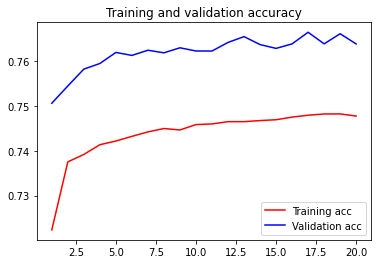

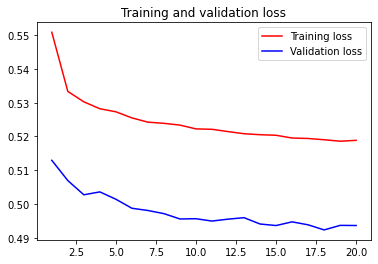

In [67]:
acc = textcnn_history.history['acc']
val_acc = textcnn_history.history['val_acc']
loss = textcnn_history.history['loss']
val_loss = textcnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()


In [125]:
import json
textcnndict = textcnn_history.history
json.dump(bigru_historydict, open('textcnn_history.json', 'w'))
#history_dict = json.load(open('bigru_history.json', 'r'))

In [68]:
inp = Input(shape=(maxlen,), dtype='int32')
x = embedding_layer(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size=3)(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
outp = Dense(len(int_category), activation="softmax")(x)

BiGRU = Model(inp, outp)
BiGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

BiGRU.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 100)      47991000    input_5[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 50, 100)      0           embedding_3[1][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 50, 256)      175872      spatial_dropout1d_2[0][0]        
__________________________________________________________________________________________________
conv1d_11 

In [69]:
bigru_history = BiGRU.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Train on 911870 samples, validate on 227968 samples
Epoch 1/20
911870/911870 [==============================] - 648s 711us/step - loss: 0.5141 - acc: 0.7443 - val_loss: 0.4764 - val_acc: 0.7726
Epoch 2/20
911870/911870 [==============================] - 642s 704us/step - loss: 0.4855 - acc: 0.7640 - val_loss: 0.4636 - val_acc: 0.7785
Epoch 3/20
911870/911870 [==============================] - 643s 705us/step - loss: 0.4755 - acc: 0.7710 - val_loss: 0.4606 - val_acc: 0.7809
Epoch 4/20
911870/911870 [==============================] - 640s 702us/step - loss: 0.4702 - acc: 0.7743 - val_loss: 0.4540 - val_acc: 0.7849
Epoch 5/20
911870/911870 [==============================] - 641s 703us/step - loss: 0.4664 - acc: 0.7767 - val_loss: 0.4639 - val_acc: 0.7797
Epoch 6/20
911870/911870 [==============================] - 641s 703us/step - loss: 0.4627 - acc: 0.7794 - val_loss: 0.4529 - val_acc: 0.7858
Epoch 7/20
911870/911870 [==============================] - 652s 715us/step - loss: 0.4605 - acc

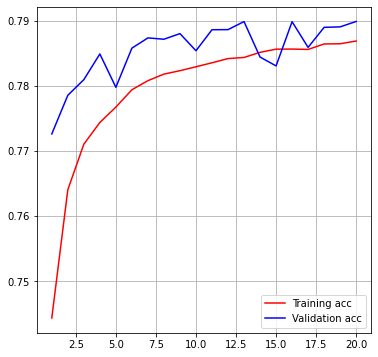

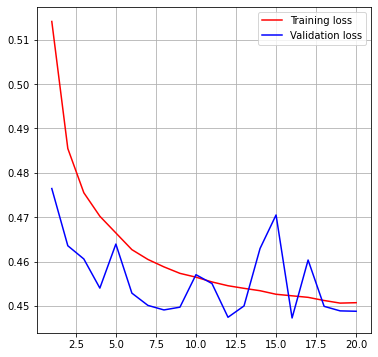

In [112]:
plt.rcParams['figure.figsize'] = (6,6)

acc = bigru_history.history['acc']
val_acc = bigru_history.history['val_acc']
loss = bigru_history.history['loss']
val_loss = bigru_history.history['val_loss']
epochs = range(1, len(acc) + 1)

#plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.grid(True)
plt.figure()
#plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
bigru_historydict = bigru_history.history

In [123]:
import json
json.dump(bigru_historydict, open('bigru_history.json', 'w'))
history_dict = json.load(open('bigru_history.json', 'r'))


In [71]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        #keras版本功能冲突，降低版本       
#         self.kernel = self.add_weight(shape=(self.input_dim, self.units),
#         name='kernel',
#         initializer=self.kernel_initializer,
#         regularizer=self.kernel_regularizer,
#         constraint=self.kernel_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        print(self.W_constraint)
        print('{}_W'.format(self.name))
        print(self.W_regularizer)
        print((input_shape[-1],))
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
    

lstm_layer = LSTM(300, dropout=0.25, recurrent_dropout=0.25, return_sequences=True)

inp = Input(shape=(maxlen,), dtype='int32')
embedding= embedding_layer(inp)
x = lstm_layer(embedding)
x = Dropout(0.25)(x)
print(x)
merged = Attention(maxlen)(x)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.25)(merged)
merged = BatchNormalization()(merged)
outp = Dense(len(int_category), activation='softmax')(merged)

AttentionLSTM = Model(inputs=inp, outputs=outp)
AttentionLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

AttentionLSTM.summary()

Tensor("dropout_13/cond/Merge:0", shape=(?, ?, 300), dtype=float32)
None
attention_1_W
None
(300,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 50, 100)           47991000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 300)           481200    
_________________________________________________________________
dropout_13 (Dropout)         (None, 50, 300)           0         
_________________________________________________________________
attention_1 (Attention)      (None, 300)               350       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               77056     
___________________________________________

In [72]:
attlstm_history = AttentionLSTM.fit(x_train, 
                                    y_train, 
                                    batch_size=128, 
                                    epochs=20, 
                                    validation_data=(x_val, y_val))

Train on 911870 samples, validate on 227968 samples
Epoch 1/20
911870/911870 [==============================] - 550s 603us/step - loss: 0.5223 - acc: 0.7392 - val_loss: 0.4792 - val_acc: 0.7702
Epoch 2/20
911870/911870 [==============================] - 544s 597us/step - loss: 0.4849 - acc: 0.7655 - val_loss: 0.4631 - val_acc: 0.7788
Epoch 3/20
911870/911870 [==============================] - 548s 601us/step - loss: 0.4723 - acc: 0.7742 - val_loss: 0.4543 - val_acc: 0.7845
Epoch 4/20
911870/911870 [==============================] - 541s 594us/step - loss: 0.4642 - acc: 0.7795 - val_loss: 0.4504 - val_acc: 0.7869
Epoch 5/20
911870/911870 [==============================] - 544s 596us/step - loss: 0.4580 - acc: 0.7830 - val_loss: 0.4469 - val_acc: 0.7888
Epoch 6/20
911870/911870 [==============================] - 543s 596us/step - loss: 0.4540 - acc: 0.7855 - val_loss: 0.4447 - val_acc: 0.7906
Epoch 7/20
911870/911870 [==============================] - 541s 593us/step - loss: 0.4502 - acc

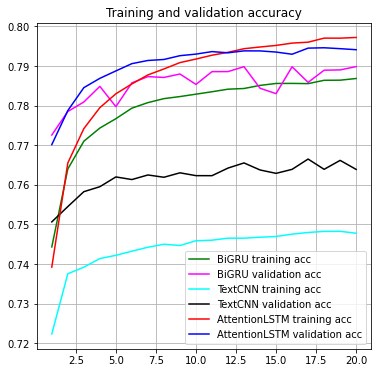

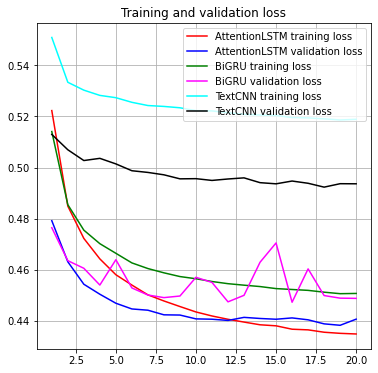

In [137]:
acc = attlstm_history.history['acc']
val_acc = attlstm_history.history['val_acc']
loss = attlstm_history.history['loss']
val_loss = attlstm_history.history['val_loss']
epochs = range(1, len(acc) + 1)

textacc = textcnn_history.history['acc']
textval_acc = textcnn_history.history['val_acc']
textloss = textcnn_history.history['loss']
textval_loss = textcnn_history.history['val_loss']



biacc = bigru_history.history['acc']
bival_acc = bigru_history.history['val_acc']
biloss = bigru_history.history['loss']
bival_loss = bigru_history.history['val_loss']


#plt.title('Training and validation accuracy')
plt.plot(epochs, biacc, 'green', label='BiGRU training acc')
plt.plot(epochs, bival_acc, 'Magenta', label='BiGRU validation acc')

plt.plot(epochs, textacc, 'cyan', label='TextCNN training acc')
plt.plot(epochs, textval_acc, 'black', label='TextCNN validation acc')


plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='AttentionLSTM training acc')
plt.plot(epochs, val_acc, 'blue', label='AttentionLSTM validation acc')
plt.legend()
plt.grid(True)
plt.figure()



plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='AttentionLSTM training loss')
plt.plot(epochs, val_loss, 'blue', label='AttentionLSTM validation loss')
plt.plot(epochs, biloss, 'green', label='BiGRU training loss')
plt.plot(epochs, bival_loss, 'Magenta', label='BiGRU validation loss')
plt.plot(epochs, textloss, 'cyan', label='TextCNN training loss')
plt.plot(epochs, textval_loss, 'black', label='TextCNN validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
import json
attlstm_historydict = attlstm_history.history
json.dump(attlstm_historydict, open('bigru_history.json', 'w'))
#history_dict = json.load(open('bigru_history.json', 'r'))

In [74]:
predicted = AttentionLSTM.predict(x_val)
cm = pd.DataFrame(confusion_matrix(y_val.argmax(axis=1), predicted.argmax(axis=1)))
from IPython.display import display
pd.options.display.max_columns = None
display(cm)

,0,1
0,91302,22944
1,23990,89732


In [163]:
cm


,0,1
0,91302,22944
1,23990,89732


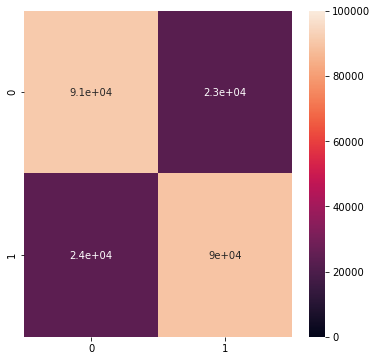

In [96]:
import seaborn as sns
sns.heatmap(cm, vmin=0, vmax=100000, annot=True)

In [84]:
1+1

2

In [114]:
#BiGRU.save('bigru_sentiment.h5')

In [113]:
#TextCNN.save('textcnn_sentiment.h5')

In [145]:
#AttentionLSTM.save('attention_sentiment.h5')

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


def evaluate_accuracy(model):
    predicted = model.predict(x_val)
    #print(classification_report(y_val, predicted))
    diff = y_val.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)
print("model TextCNN accuracy:          %.6f" % evaluate_accuracy(TextCNN))
print("model Bidirectional GRU + Conv:  %.6f" % evaluate_accuracy(BiGRU))
print("model LSTM with Attention:       %.6f" % evaluate_accuracy(AttentionLSTM))

model TextCNN accuracy:          0.763897
model Bidirectional GRU + Conv:  0.789852
model LSTM with Attention:       0.794120


In [76]:
def evaluate_accuracy_ensemble(models):
    res = np.zeros(shape=y_val.shape)
    for model in models:
        predicted = model.predict(x_val)
        res += predicted
    res /= len(models)
    diff = y_val.argmax(axis=-1) - res.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)

#模型融合前的分数是多少，融合之后的提升又是多少
print(evaluate_accuracy_ensemble([TextCNN, BiGRU, AttentionLSTM]))

0.7946641633913532


In [138]:
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input, Conv1D, GlobalMaxPool1D, Dropout, concatenate, Layer, InputSpec, CuDNNLSTM
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import activations, initializers, regularizers, constraints
from keras.utils.conv_utils import conv_output_length
from keras.regularizers import l2
from keras.constraints import maxnorm


In [155]:
batch_size = 2048
epochs = 7
embed_size = 100

def cudnnlstm_model(conv_layers = 2, max_dilation_rate = 3):
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=True)(inp)
    x = Dropout(0.25)(x)
    x = Conv1D(2*embed_size, kernel_size = 3)(x)
    prefilt = Conv1D(2*embed_size, kernel_size = 3)(x)
    x = prefilt
    for strides in [1, 1, 2]:
        x = Conv1D(128*2**(strides), strides = strides, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_size=3, kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)
    x_f = CuDNNLSTM(512, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)  
    x_b = CuDNNLSTM(512, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)
    x = concatenate([x_f, x_b])
    x = Dropout(0.5)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(2, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])

    return model

In [156]:
cudnnlstm_model = cudnnlstm_model()
cudnnlstm_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 50, 100)      5000000     input_10[0][0]                   
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 50, 100)      0           embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_27 (Conv1D)              (None, 48, 200)      60200       dropout_24[0][0]                 
__________________________________________________________________________________________________
conv1d_28 

In [157]:
weight_path="early_weights.hdf5"
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks = [checkpoint, early_stopping]

In [158]:
cudnnlstm_model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_val, y_val))

Train on 911870 samples, validate on 227968 samples
Epoch 1/20
593792/911870 [==================>...........] - ETA: 1:23 - loss: 0.7066 - binary_accuracy: 0.5043

KeyboardInterrupt: 

In [ ]:
cudnnlstm_model.load_weights(weight_path)
score, acc = cudnnlstm_model.evaluate(x_val, y_val, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

In [174]:
p_df2.to_csv('p_df2.csv')

In [164]:
train,test = train_test_split(p_df2,test_size=0.2,random_state=42)

In [167]:
train_clean_tweet = train.text_cleaned.tolist()
test_clean_tweet = test.text_cleaned.tolist()

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [173]:
gc.collect()

17

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [171]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    XGBClassifier(),
    MLPClassifier(solver='sgd', alpha=1e-5,
       hidden_layer_sizes=(5, 2), random_state=1, max_iter=500),
    GradientBoostingClassifier(random_state=0)
    
]